#CNN on CIFAR-10



CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week3/images/cifar10.jpg?raw=1" style="width:80%">

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                                     "dog", "frog", "horse", "ship", "truck"]

x_mean = np.mean(x_train, axis=(0, 1,2),keepdims=True)
x_std = np.std(x_train, axis=(0, 1,2),keepdims=True)
x_train_norm = (x_train - x_mean) / x_std
x_test_norm = (x_test - x_mean) / x_std
y_train_onehot = pd.get_dummies(y_train.squeeze()).values
y_test_onehot = pd.get_dummies(y_test.squeeze()).values

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


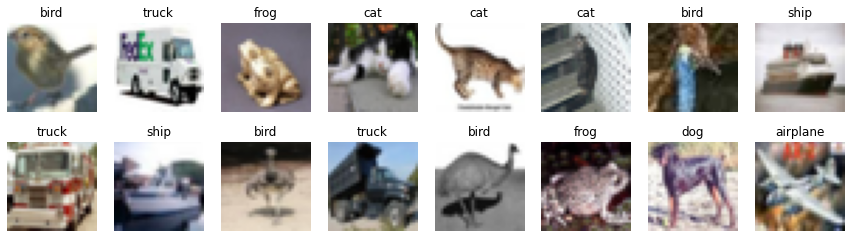

In [3]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
        for j in range(rows):
                random_index = np.random.randint(0, len(y_train))
                ax = fig.add_subplot(rows, cols, i * rows + j + 1)
                ax.grid('off')
                ax.axis('off')
                ax.imshow(x_train[random_index, :])
                ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from functools import partial
tfph = tf.compat.v1.placeholder
tf.compat.v1.disable_eager_execution()
from modeling import BaseConv, StridedConv, ResidualConv, Model, Attention
BC, SC, RC, AC = BaseConv, StridedConv, ResidualConv, Attention

layers = [BC(8), SC(16), BC(16), SC(32), AC(32), AC(32), SC(64), AC(64), AC(64)]


batch_size = 4

In [ ]:
mdl = Model(x_test_norm=x_test_norm,x_train_norm = x_train_norm,
            y_test_onehot=y_test_onehot,y_train_onehot = y_train_onehot,
           layers=layers, y_test = y_test)
mdl.train(batch_size = batch_size, steps = 2000)

C:\workspace\Teaching\cifar_10\modeling.py:140: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  return self.layer(signal)
C:\Users\10838233\Anaconda3\envs\tf2\lib\site-packages\keras\legacy_tf_layers\convolutional.py:575: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
C:\workspace\Teaching\cifar_10\modeling.py:101: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  for _ in range(3)
C:\workspace\Teaching\cifar_10\modeling.py:128: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  tf.compat.v1.layers.dense(self.e, self.size) + self.e
C:\Users\10838233\Anaconda3\envs\tf2\lib\site-packages\keras\legacy_tf_layers\core.py:261: UserWarning:

3.136813
2.7684803


In [ ]:
np.mean(mdl.losses[-10:]), np.min(mdl.val_losses)

In [ ]:

plt.plot(mdl.losses, label = 'train')
plt.plot([x*len(mdl.losses)/len(mdl.val_losses) for x in range(len(mdl.val_losses))], mdl.val_losses, label = 'validation')
fig.legend()

In [ ]:
plt.plot(mdl.val_acc)

In [ ]:
# validate model